# Oscillatory Motion and Chaos

Consider the linear, damped, driven pendulum, defined by the differential equation:
$$
\frac{d^2\theta}{dt^2} = -\frac{g}{l}\theta-2\gamma \frac{d\theta}{dt} + \alpha_Dsin(\Omega_Dt)
$$
where $g = 9.8m/s^2$, $l=9.8 m$, $\gamma = 0.25 s^{-1}$, $\alpha_D = 0.2 rad/s^2$.
Rewrite the equation as:
$$
\frac{d^2\theta}{dt^2} = -\frac{g}{l}\theta-2\gamma \frac{d\theta}{dt} + \alpha_Dexp(i\Omega_Dt).
$$
Assume the solution is $\theta = Aexp(i\Omega_Dt)$, and then plug it into the above equation.
$$
-A\Omega^2_D = -\frac{g}{l}A - 2\gamma Ai\Omega_D + \alpha_D
$$
The solution of A is
$$
A = \frac{\alpha_D}{\frac{g}{l} + 2\gamma i\Omega_D - \Omega^2_D}
$$
In order to find the maximum of $A$, we need to find the minimum of $|\frac{g}{l}+2\gamma i\Omega_D - \Omega^2_D|^2$ 
$$
|\frac{g}{l}+2\gamma i\Omega_D - \Omega^2_D|^2 = (\frac{g}{l}+2\gamma i\Omega_D - \Omega^2_D)\times({\frac{g}{l}-2\gamma i\Omega_D - \Omega^2_D})\\
=\Omega^4_D + 2(2\gamma^2 - \frac{g}{l})\Omega^2_D + \frac{g^2}{l^2}\\
=[\Omega^2_D + (2\gamma^2 - \frac{g}{l})]^2 + \frac{g^2}{l^2} - (2\gamma^2 - \frac{g}{l})^2
$$

Thus, $\Omega_D = \sqrt{\frac{g}{l} - 2\gamma^2} = \sqrt{1-\frac{1}{8}} \approx 0.935$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
g = 9.8 # acceleration of gravity
l = 9.8
gamma = 0.25
alpha_D = 0.2
Omega_D = 0.935
dt = 0.01 # in s
time = 100 # in s
time_step = np.arange(0,time,dt)
steps = len(time_step)

In [3]:
def derivs(state_instant, t, alpha, Omega):
    """
    Calculate the derivatives of the angle and the angular velocity 
    based on the current state
    """
    dtheta_dt = state_instant[1]
    dw_dt = (-g*state_instant[0]/l - 2*gamma*state_instant[1] 
             +alpha*np.sin(Omega*t))
    return np.array([dtheta_dt, dw_dt])   

Using the EulerCromer method to calculate $\theta(t)$
$$
\omega_{i+1} = \omega_{i} +[-\frac{g}{l}\theta_i - 2\gamma\omega_i + \alpha_Dsin(\Omega_Dt_i)]dt \\
\theta_{i+1} = \theta_i +\omega_{i+1}dt
$$

In [4]:
def Euler_Cramer(state_instant, t, alpha, Omega, derivs):
    """
    Calculate the next state based on the current state using Euler-Cramer method
    """
    output = derivs(state_instant, t, alpha, Omega)
    next_omega = state_instant[1] + output[1]*dt
    next_theta = state_instant[0] + next_omega*dt
    return np.array([next_theta, next_omega])

In [5]:
state = np.zeros((steps,2)) # a matrix used to record the angle information at each moment in the first column and the angular velocity in the second column
state[0,0] = np.pi/12

for i in range(1,steps):
    state[i] = Euler_Cramer(state[i-1], time_step[i], alpha_D, Omega_D, derivs) 

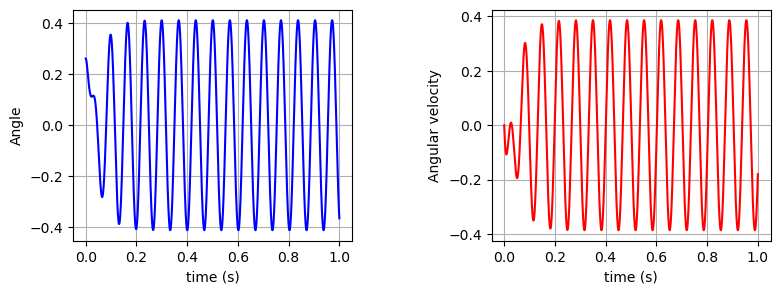

In [6]:
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.plot(time_step*dt, state[:,0], '-b')
plt.xlabel('time (s)')
plt.ylabel('Angle')
plt.grid()
plt.subplot(1,2,2)
plt.plot(time_step*dt, state[:,1], '-r')
plt.xlabel('time (s)')
plt.ylabel('Angular velocity')
plt.grid()
plt.subplots_adjust(wspace=0.5)
plt.show()

Using the Runge-Kutta $4^{th}$ method to calculate $\theta(t)$ and $\omega(t)$

In [7]:
def Runge_Kutta4(state_instant, t, alpha, Omega, derivs):
    """
    Calculate the next state based on the current state using Runge-Kutta fourth order method
    """
    k0 = dt*derivs(state_instant, t, alpha, Omega)
    k1 = dt*derivs(state_instant+0.5*k0, t+0.5*dt, alpha, Omega)
    k2 = dt*derivs(state_instant+0.5*k1, t+0.5*dt, alpha, Omega)
    k3 = dt*derivs(state_instant+k2, t+dt, alpha, Omega)  
    return state_instant+(k0+2*k1+2*k2+k3)/6

In [8]:
state_RK = np.zeros((steps,2))
state_RK[0,0] = np.pi/12
for i in range(1,steps):
    state_RK[i] = Runge_Kutta4(state_RK[i-1], time_step[i], alpha_D, Omega_D, derivs)  

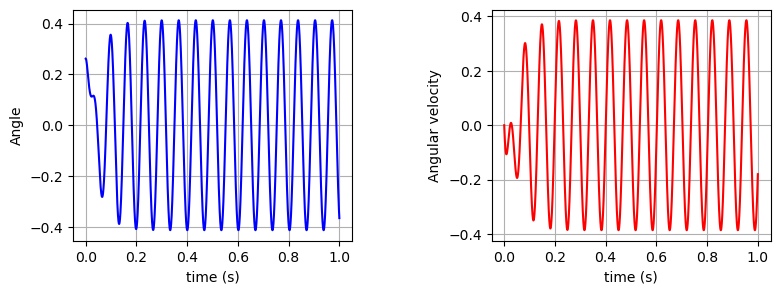

In [9]:
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.plot(time_step*dt, state_RK[:,0], '-b')
plt.xlabel('time (s)')
plt.ylabel('Angle')
plt.grid()
plt.subplot(1,2,2)
plt.plot(time_step*dt, state_RK[:,1], '-r')
plt.xlabel('time (s)')
plt.ylabel('Angular velocity')
plt.grid()
plt.subplots_adjust(wspace=0.5)
plt.show()

Sweep the driven frequency, extract the amplitude $\theta_0(\Omega_D)$, and plot the resonance curve of this pendulum.

In [10]:
def find_amp(alpha, Omega, Runge_Kutta4):
    y = np.zeros((steps,2))
    y[0,0] = np.pi/12
    y[0,1] = 0
    for i in range(1,steps):
        y[i] = Runge_Kutta4(y[i-1], time_step[i], alpha, Omega, derivs)
    period = 2*np.pi/Omega
    last_period = int(period/dt + 1)
    amp = max(y[-last_period:-1,0])
    return amp

In [11]:
Omegas = np.linspace(0.1, 1.5, 100)
Amps = np.zeros(len(Omegas))
for i in range(len(Omegas)):
    Amps[i] = find_amp(alpha_D, Omegas[i], Runge_Kutta4)

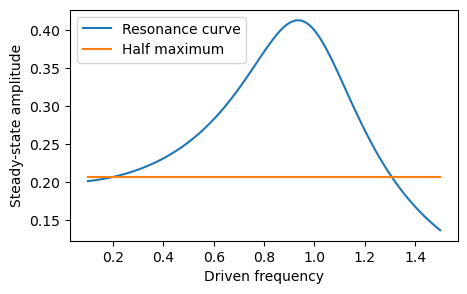

In [12]:
plt.figure(figsize=(5,3))
plt.plot(Omegas, Amps, label='Resonance curve')
plt.plot(Omegas, 0.5*max(Amps)*np.ones(len(Omegas)), label='Half maximum')
plt.legend()
plt.xlabel('Driven frequency')
plt.ylabel('Steady-state amplitude')
plt.show()

For a driving frequency close to resonance, the total energy of pendulum is 
$$
E_{tot} = E_k + E_p = \frac{1}{2}ml^2\omega^2 + \frac{1}{2}mlg\theta^2
$$

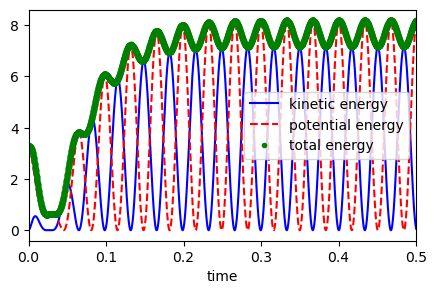

In [13]:
Ek = 0.5*l**2*np.square(state_RK[:,1])
Ep = 0.5*g*l*np.square(state_RK[:,0])
plt.figure(figsize=(5,3))
plt.plot(time_step*dt, Ek, '-b', time_step*dt, Ep, '--r', time_step*dt, Ek+Ep, '.g')
plt.legend(['kinetic energy', 'potential energy', 'total energy'], loc='center right')
plt.xlabel('time')
plt.xlim(0,0.5)
plt.show()

Switch on non-linear effects by replacing $\theta$ with $sin(\theta)$ in the restoring force and plot and compare to the previous results for $\theta(t)$ and $\omega(t)$ using $\Omega_D$ close to resonance. 
$$
\frac{d^2\theta}{dt^2} = -\frac{g}{l}sin(\theta)-2\gamma \frac{d\theta}{dt} + \alpha_Dsin(\Omega_Dt)
$$
Then increase $\alpha_D$ to $1.2rad/s^2$ and redo the calculation.

In [14]:
def derivs_nonLinear(state_instant, t, alpha, Omega):
    """
    Calculate the derivatives of the angle and the angular velocity 
    based on the current state
    """
    dtheta_dt = state_instant[1]
    dw_dt = (-g*np.sin(state_instant[0])/l - 2*gamma*state_instant[1] 
             +alpha*np.sin(Omega*t))
    return np.array([dtheta_dt, dw_dt])   

In [15]:
y_nonLinear_1 = np.zeros((steps,2))
y_nonLinear_1[0,0] = np.pi/3
for i in range(1,steps):
    y_nonLinear_1[i] = Runge_Kutta4(y_nonLinear_1[i-1], time_step[i], alpha_D, Omega_D, derivs_nonLinear)  

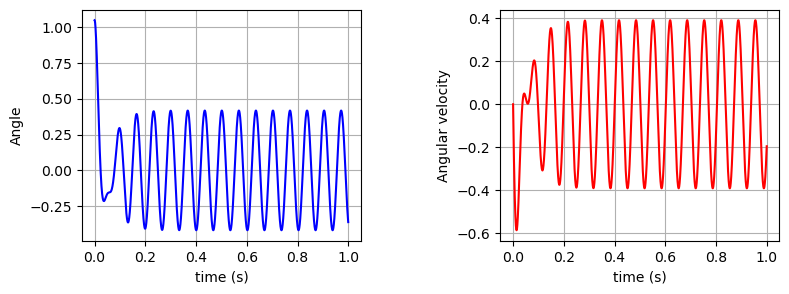

In [16]:
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.plot(time_step*dt, y_nonLinear_1[:,0], '-b')
plt.xlabel('time (s)')
plt.ylabel('Angle')
plt.grid()
plt.subplot(1,2,2)
plt.plot(time_step*dt, y_nonLinear_1[:,1], '-r')
plt.xlabel('time (s)')
plt.ylabel('Angular velocity')
plt.grid()
plt.subplots_adjust(wspace=0.5)
plt.show()

Now switch $\alpha_D$ from $0.2$ to $1.2$

In [17]:
y_nonLinear_2 = np.zeros((steps,2))
y_nonLinear_2[0,0] = np.pi/3
for i in range(1,steps):
    y_nonLinear_2[i] = Runge_Kutta4(y_nonLinear_2[i-1], time_step[i], 1.2, Omega_D, derivs_nonLinear) 

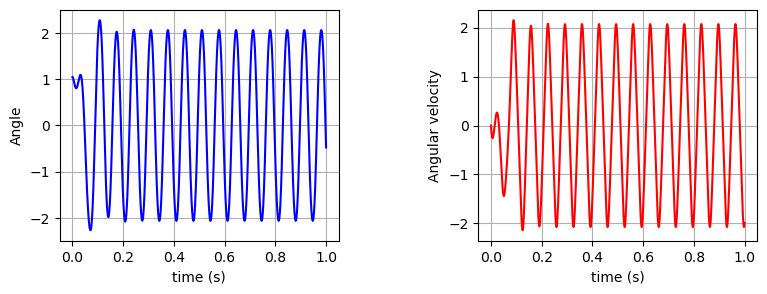

In [18]:
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.plot(time_step*dt, y_nonLinear_2[:,0], '-b')
plt.xlabel('time (s)')
plt.ylabel('Angle')
plt.grid()
plt.subplot(1,2,2)
plt.plot(time_step*dt, y_nonLinear_2[:,1], '-r')
plt.xlabel('time (s)')
plt.ylabel('Angular velocity')
plt.grid()
plt.subplots_adjust(wspace=0.5)
plt.show()

Use the non-linear pendulum with $\Omega_D=0.666s^{-1}$ and values of $\alpha_D=0.2$, $0.5$ and $1.2rad/s^2$ to compute $|\Delta\theta(t)|$ fro several trajectories with slightly different initial angle ($\Delta\theta_{in} \approx 0.001$ rad).

In [19]:
delta_theta = 0.001
state_num = 5

state_group_1 = np.zeros((5, steps, 2))
for i in range(state_num): # start with alpha_D = 0.2
    state_group_1[i,0,0] = np.pi/12 + i*delta_theta
    for j in range(1, steps):
        state_group_1[i,j,:] = Runge_Kutta4(state_group_1[i,j-1,:], time_step[j], 0.2, 0.666, derivs_nonLinear)      

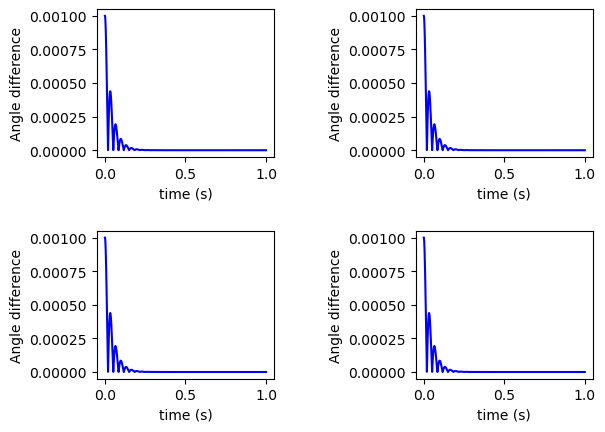

In [20]:
for i in range(state_num-1):
    plt.subplot(2,2,i+1)
    plt.plot(time_step*dt, abs(state_group_1[i+1,:,0]-state_group_1[i,:,0]), '-b')
    plt.xlabel('time (s)')
    plt.ylabel('Angle difference')
plt.subplots_adjust(wspace=0.8,hspace=0.5)
plt.show()

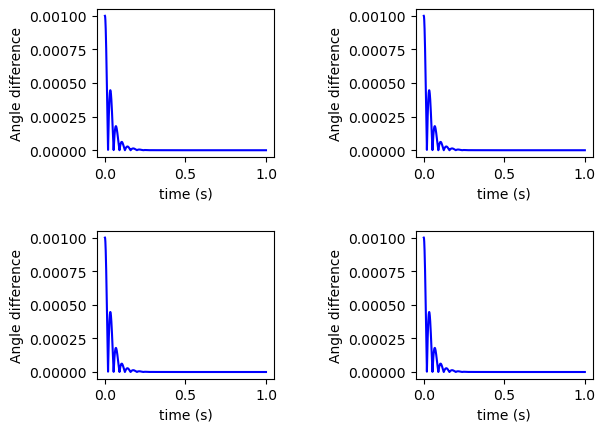

In [21]:
state_group_2 = np.zeros((5, steps, 2))
for i in range(state_num): # alpha_D = 0.5
    state_group_2[i,0,0] = np.pi/12 + i*delta_theta
    for j in range(1, steps):
        state_group_2[i,j,:] = Runge_Kutta4(state_group_2[i,j-1,:], time_step[j], 0.5, 0.666, derivs_nonLinear)    
for i in range(state_num-1):
    plt.subplot(2,2,i+1)
    plt.plot(time_step*dt, abs(state_group_2[i+1,:,0]-state_group_2[i,:,0]), '-b')
    plt.xlabel('time (s)')
    plt.ylabel('Angle difference')
plt.subplots_adjust(wspace=0.8,hspace=0.5)
plt.show()

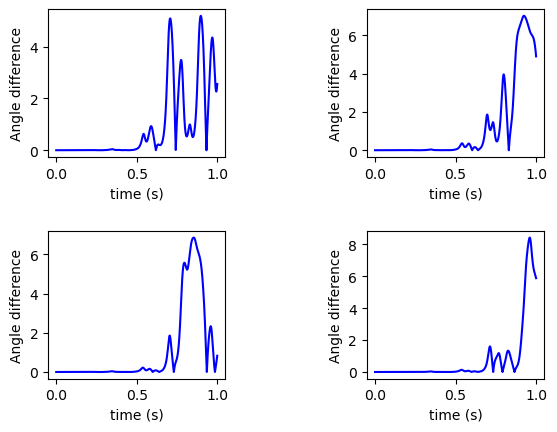

In [22]:
state_group_3 = np.zeros((5, steps, 2))
for i in range(state_num): # alpha_D = 1.2
    state_group_3[i,0,0] = np.pi/12 + i*delta_theta
    for j in range(1, steps):
        state_group_3[i,j,:] = Runge_Kutta4(state_group_3[i,j-1,:], time_step[j], 1.2, 0.666, derivs_nonLinear)    
for i in range(state_num-1):
    plt.subplot(2,2,i+1)
    plt.plot(time_step*dt, abs(state_group_3[i+1,:,0]-state_group_3[i,:,0]), '-b')
    plt.xlabel('time (s)')
    plt.ylabel('Angle difference')
plt.subplots_adjust(wspace=0.8,hspace=0.5)
plt.show()

In this case, $\alpha_D = 1.2 rad/s^2$, chaotic phenomena appear.